# **KNN & PCA**
##Assignment Questions
### **Theoretical**


1. What is K-Nearest Neighbors (KNN) and how does it work?
  - K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks.
  - It assigns the data point to the nearest class associated with it.

2. What is the difference between KNN Classification and KNN Regression?
  - KNN classifier predicts the class label . It takes the majority voting among K neighbours.
  - KNN regressior predicts the continuous value. It takes the average of K neighbours.

3. What is the role of the distance metric in KNN?
  - The distance metric in KNN plays a central role — it's how the algorithm decides which points are "nearest" to the one you're trying to classify or predict.
  - The distance metric determines the "closeness" or "similarity" between points.

4.  What is the Curse of Dimensionality in KNN?
  - It says that as we increase the number of features/dimentionality the computational cost increases and the distance between data points becomes less meaningful.

5. How can we choose the best value of K in KNN?
  - K can be choosen by hyper-parameter tuning.

6. What are KD Tree and Ball Tree in KNN?
  - They are spatial partitioning trees — they organize data in a way that makes it much faster to find the nearest neighbors than brute-force search.
  - KD Tree: A binary tree that recursively splits the data across dimensions (features).
  - Ball Tree: Instead of splitting by axis, it groups points into balls (hyperspheres).

7. When should you use KD Tree vs. Ball Tree?
  - KD Tree: When the number of fearures are less. Typically less than 30.
  - Ball Tree: When we have more number of features like greater than 30.

8. What are the disadvantages of KNN?
  - It is a lazy learner.
  - High computational time for training data.

9. How does feature scaling affect KNN?
  - Upon scaling the model gives better performance, makes a fair comparision and classifies to	Accurate neighbors.

10. What is PCA (Principal Component Analysis)?
  - It is the process of converting the high dimensional data to low dimensional data through Eigan Decomposition of Covarience Matrix.

11. How does PCA work?
  - It  Projects data into a new coordinate system such that the most variance lies on the first axis (PC1), the second most on the second axis (PC2).

12.  What is the geometric intuition behind PCA?
  - PCA tries to find the directions in which the data is spread out the most.

13.  What is the difference between Feature Selection and Feature Extraction?
  - Feature Selection: Based on the correlation we will only choose those features which are important.
  - Feature Extraction:It creates new features from existing ones by
  capturing most of the information in fewer features.

14. What are Eigenvalues and Eigenvectors in PCA?
  - Eigan Values: It gives the equivalent quantatiy in which direction the varience is spread.
  - Eigan Vector: It gives the direction in with the varience is spread corresponding to it's eigan vector.

15. How do you decide the number of components to keep in PCA?
  - The goal is to retain as much variance as possible while reducing the complexity of the dataset.
  - We need to choose the number of components such that the cumulative variance exceeds a predefined threshold (commonly 90% or 95%).

16. Can PCA be used for classification?
  - Yes, It can play an important role in classification.

17. What are the limitations of PCA?
  - PCA will loose the pattern.
  - We cannot use it when the data is spread is same in all the directions.

18. How do KNN and PCA complement each other?
  - PCA reduces dimensionality and noise, while KNN exploits local structure for classification/regression.
  - By first projecting high-dimensional data onto its most informative principal components, we mitigate the curse of dimensionality, filter out noise, and drastically cut computational cost.
  - Later we can implement the KNN algo.

19. How does KNN handle missing values in a dataset?
  - By KNN imputation
  - KNN imputation fills in missing entries by leveraging the values of the nearest complete instances, preserving feature correlations and often improving downstream model performance.

20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
  - PCA is an unsupervised method that finds directions of maximum variance without using class labels.
  - LDA is a supervised technique that finds projections maximizing class separability.It  maximizes the ratio of between-class scatter to within-class scatter

###**Practical**

In [1]:
#21. Train a KNN Classifier on the Iris dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()

x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 1.0


In [2]:
#22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x,y=make_regression(n_samples=1000,n_features=3,noise=0.1,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 736.6135513251414


In [6]:
#23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris=load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

knn_euclidean=KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn_euclidean.fit(x_train,y_train)

knn_manhattan=KNeighborsClassifier(n_neighbors=10,metric='manhattan')
knn_manhattan.fit(x_train,y_train)

y_pred_euclidean=knn_euclidean.predict(x_test)
y_pred_manhattan=knn_manhattan.predict(x_test)

accuracy_euclidean=accuracy_score(y_test,y_pred_euclidean)
accuracy_manhattan=accuracy_score(y_test,y_pred_manhattan)

print("Accuracy with Euclidean Distance:",accuracy_euclidean)
print("Accuracy with Manhattan Distance:",accuracy_manhattan)

Accuracy with Euclidean Distance: 0.9666666666666667
Accuracy with Manhattan Distance: 0.9666666666666667


In [8]:
#24. 5 Train a KNN Classifier with different values of K and visualize decision boundaried
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import numpy as np

x,y=make_classification(n_samples=1000,n_features=5,n_classes=2,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

k_values=[1,2,3,4,5,6,7,9]
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  print("Accuracy with k=",k,":",accuracy)


Accuracy with k= 1 : 0.815
Accuracy with k= 2 : 0.785
Accuracy with k= 3 : 0.84
Accuracy with k= 4 : 0.82
Accuracy with k= 5 : 0.845
Accuracy with k= 6 : 0.845
Accuracy with k= 7 : 0.855
Accuracy with k= 9 : 0.845


In [15]:
#25. Apply Feature Scaling before training a KNN model and compare results with unscaled data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data=load_iris()
x=data.data
y=data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy with unscaled data:",accuracy)

knn_scaled=KNeighborsClassifier(n_neighbors=8)
knn_scaled.fit(x_train_scaled,y_train)
y_pred_scaled=knn_scaled.predict(x_test_scaled)
accuracy_scaled=accuracy_score(y_test,y_pred_scaled)
print("Accuracy with scaled data:",accuracy_scaled)

Accuracy with unscaled data: 0.9666666666666667
Accuracy with scaled data: 1.0


In [16]:
#26.  Train a PCA model on synthetic data and print the explained variance ratio for each component

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

x,y=make_classification(n_samples=1000,n_features=5,n_classes=2,random_state=1)

pca=PCA(n_components=5)
pca.fit(x)
explained_variance_ratio=pca.explained_variance_ratio_
print("Explained Variance Ratio:",explained_variance_ratio)


Explained Variance Ratio: [6.38320694e-01 2.48491194e-01 1.13188112e-01 4.02434142e-17
 0.00000000e+00]


In [17]:
#27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA5
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


X, y = make_classification(n_classes=2, n_samples=1000, n_features=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train, y_train)
y_pred_no_pca = knn_no_pca.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_with_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA (5 components): {accuracy_pca:.4f}")



Accuracy without PCA: 0.7800
Accuracy with PCA (5 components): 0.8350


In [19]:
#28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV5
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

x,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
knn=KNeighborsClassifier()
grid_search=GridSearchCV(knn,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)
best_params=grid_search.best_params_
print("Best Parameters:",best_params)

Best Parameters: {'n_neighbors': 9}


In [21]:
#29. Train a KNN Classifier and check the number of misclassified samples
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

x,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

confusion=confusion_matrix(y_test,y_pred)
misclassified_samples=confusion[0,1]+confusion[1,0]
print("Number of misclassified samples:",misclassified_samples)
confusion

Number of misclassified samples: 44


array([[69, 21],
       [23, 87]])

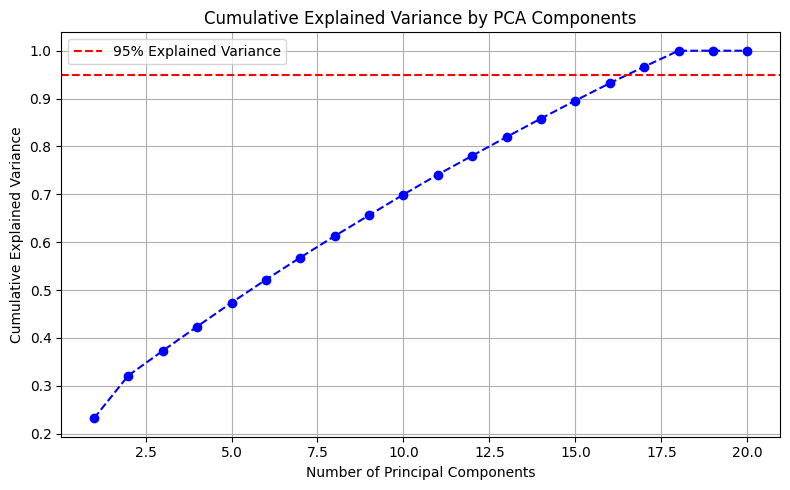

In [23]:
#30. Train a PCA model and visualize the cumulative explained variance.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(n_classes=2, n_samples=1000, n_features=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


pca = PCA()
pca.fit(X_train)

cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
#31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

knn_uniform=KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn_uniform.fit(x_train,y_train)
y_pred_uniform=knn_uniform.predict(x_test)
accuracy_uniform=accuracy_score(y_test,y_pred_uniform)
print("Accuracy with uniform weights:",accuracy_uniform)

knn_distance=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn_distance.fit(x_train,y_train)
y_pred_distance=knn_distance.predict(x_test)
accuracy_distance=accuracy_score(y_test,y_pred_distance)
print("Accuracy with distance weights:",accuracy_distance)

Accuracy with uniform weights: 0.78
Accuracy with distance weights: 0.78


In [2]:
#32. Train a KNN Regressor and analyze the effect of different K values on performance

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

x,y=make_regression(n_samples=1000,n_features=20,noise=0.1,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

k_values=[1,2,3,4,5,6,7,8,9,10]
for k in k_values:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    print("MSE with k=",k,":",mse)


MSE with k= 1 : 13523.329520684332
MSE with k= 2 : 9587.942581785628
MSE with k= 3 : 9873.830381255895
MSE with k= 4 : 9521.24032744733
MSE with k= 5 : 8676.793811049029
MSE with k= 6 : 8112.325236681679
MSE with k= 7 : 7894.125641360013
MSE with k= 8 : 7652.526397304546
MSE with k= 9 : 7812.0993960548185
MSE with k= 10 : 7621.226946468584


In [3]:
#33  Implement KNN Imputation for handling missing values in a dataset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

rng = np.random.default_rng(42)
missing_mask = rng.uniform(0, 1, X.shape) < 0.1
X[missing_mask] = np.nan

imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy after KNN Imputation: {accuracy:.4f}")




Accuracy after KNN Imputation: 0.9050


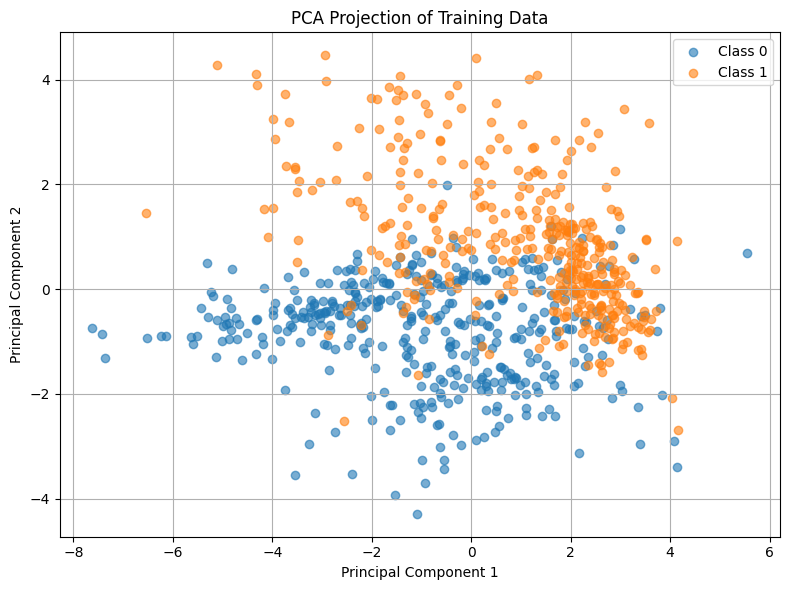

In [4]:
#34. Train a PCA model and visualize the data projection onto the first two principal components
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[y_train == 0, 0], x_train_pca[y_train == 0, 1], label="Class 0", alpha=0.6)
plt.scatter(x_train_pca[y_train == 1, 0], x_train_pca[y_train == 1, 1], label="Class 1", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Training Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
#35.Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree
from sklearn.neighbors import BallTree
from scipy.stats import mode


x,y=make_classification(n_classes=2,n_samples=1000,n_features=20,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

kd_tree=KDTree(x_train)
ball_tree=BallTree(x_train)

def predict_with_tree(tree, x_train, y_train, x_test, k=5):
    dist, ind = tree.query(x_test, k=k)
    neighbors = y_train[ind]
    majority_votes, _ = mode(neighbors, axis=1)
    return majority_votes.ravel()

y_pred_kd = predict_with_tree(kd_tree, x_train, y_train, x_test, k=5)
y_pred_ball = predict_with_tree(ball_tree, x_train, y_train, x_test, k=5)

acc_kd = accuracy_score(y_test, y_pred_kd)
acc_ball = accuracy_score(y_test, y_pred_ball)

print(f"Accuracy with KDTree:   {acc_kd:.4f}")
print(f"Accuracy with BallTree: {acc_ball:.4f}")

Accuracy with KDTree:   0.7800
Accuracy with BallTree: 0.7800


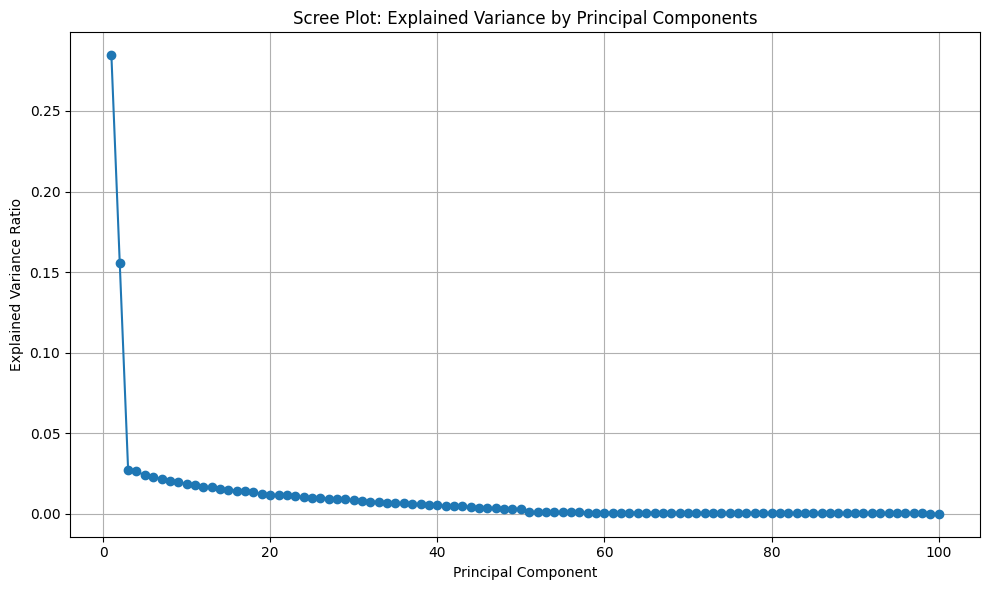

In [7]:
#36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=500, n_features=100, n_informative=50, random_state=42)

pca = PCA()
pca.fit(X)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot: Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
#37.  Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

x,y=make_classification(n_samples=1000,n_features=5,n_classes=2,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("Precision",precision)
print("Recall",recall)
print("F1-Score",f1)

Precision 0.8571428571428571
Recall 0.8125
F1-Score 0.8342245989304813


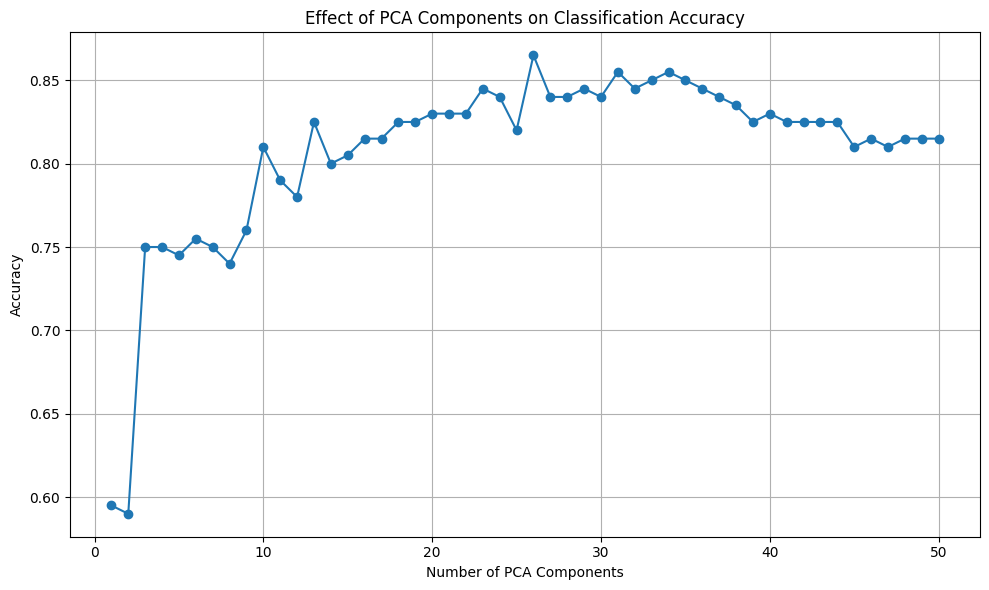

In [10]:
#38.  Train a PCA model and analyze the effect of different numbers of components on accuracy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=50, n_informative=30, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

components_range = list(range(1, 51))
accuracies = []

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracies, marker='o')
plt.title('Effect of PCA Components on Classification Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
#39. Train a KNN Classifier with different leaf_size values and compare accuracy
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

leaf_size_values=[1,2,30,40,50,60,70,80,90,100]
for leaf_size in leaf_size_values:
    knn=KNeighborsClassifier(n_neighbors=5,leaf_size=leaf_size)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print("Accuracy with leaf_size=",leaf_size,":",accuracy)

Accuracy with leaf_size= 1 : 0.78
Accuracy with leaf_size= 2 : 0.78
Accuracy with leaf_size= 30 : 0.78
Accuracy with leaf_size= 40 : 0.78
Accuracy with leaf_size= 50 : 0.78
Accuracy with leaf_size= 60 : 0.78
Accuracy with leaf_size= 70 : 0.78
Accuracy with leaf_size= 80 : 0.78
Accuracy with leaf_size= 90 : 0.78
Accuracy with leaf_size= 100 : 0.78


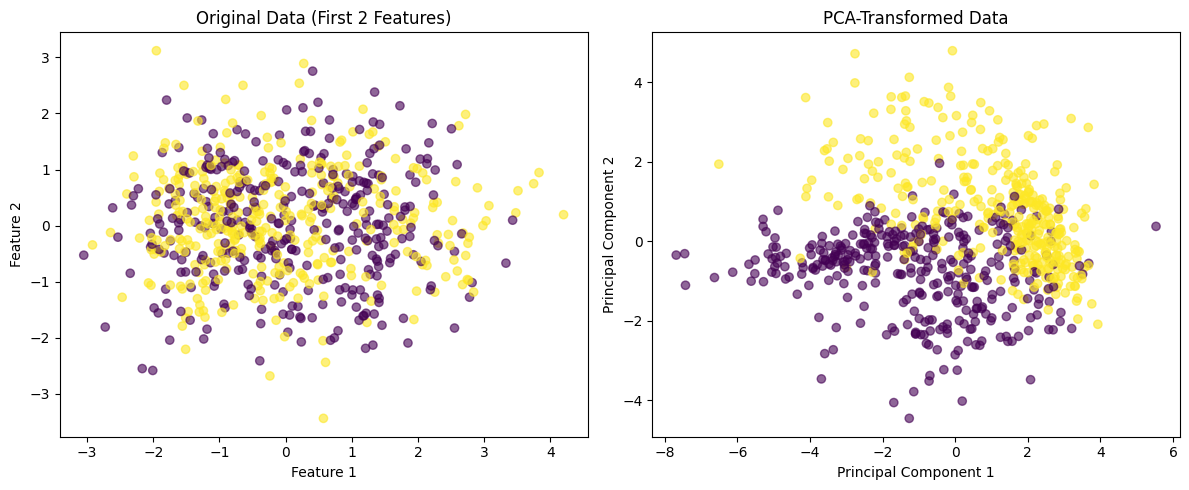

In [14]:
#40.  Train a PCA model and visualize how data points are transformed before and after PCA
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.title('Original Data (First 2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.title('PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [15]:
#41.  Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

data=load_wine()
x=data.data
y=data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.56      0.69      0.62        13
           2       0.29      0.22      0.25         9

    accuracy                           0.64        36
   macro avg       0.59      0.59      0.59        36
weighted avg       0.63      0.64      0.63        36



In [17]:
#42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

x,y=make_regression(n_features=10,n_samples=1000,noise=0.1,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

distance_metrics=['euclidean','manhattan','chebyshev','minkowski']
for metric in distance_metrics:
    knn=KNeighborsRegressor(n_neighbors=5,metric=metric)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    print("MSE with metric ",metric,":",mse)

MSE with metric  euclidean : 6268.128964673216
MSE with metric  manhattan : 7789.628709878029
MSE with metric  chebyshev : 7327.879240189637
MSE with metric  minkowski : 6268.128964673216


In [18]:
#43. Train a KNN Classifier and evaluate using ROC-AUC score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

x,y=make_classification(n_classes=2,n_samples=1000,n_features=20,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_proba=knn.predict(x_test)
print("ROC-AUC score",roc_auc_score(y_test,y_pred_proba))

ROC-AUC score 0.7757049019169757


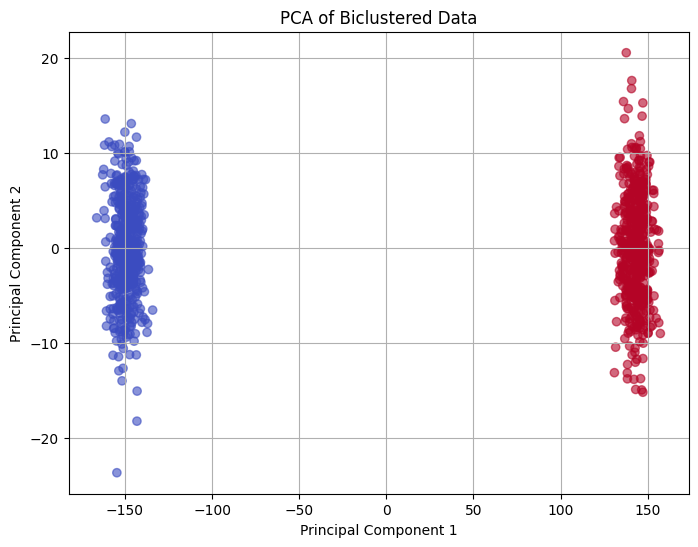

In [21]:
#44.  Train a PCA model and visualize the variance captured by each principal component
from sklearn.datasets import make_biclusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

X, rows, cols = make_biclusters(shape=(1000, 20), n_clusters=2, noise=5, random_state=1)


labels = np.zeros(X.shape[0], dtype=int)
labels[rows[1]] = 1

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.6)
plt.title("PCA of Biclustered Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [22]:
#45.  Train a KNN Classifier and perform feature selection before training
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data=load_iris()
x=data.data
y=data.target

selector=SelectKBest(chi2,k=2)
x_new=selector.fit_transform(x,y)

x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=1)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)


Accuracy 0.9666666666666667


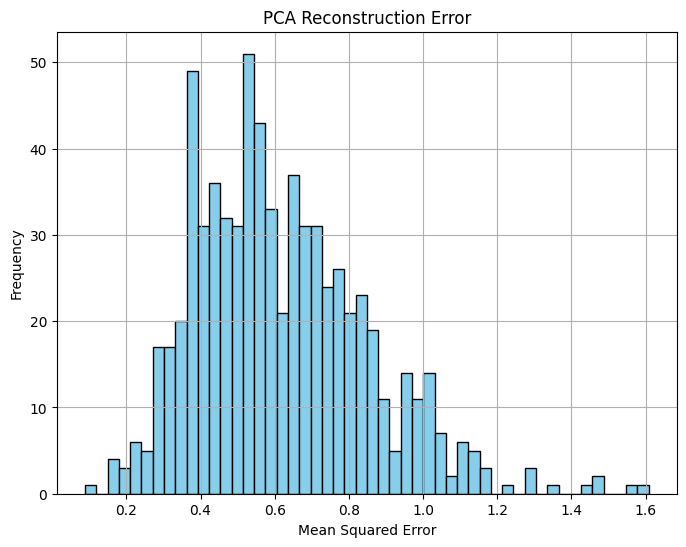

In [23]:
#46.  Train a PCA model and visualize the data reconstruction error after reducing dimensions
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=1)
x_train, x_test, _, _ = train_test_split(x, y, test_size=0.3, random_state=42)

pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train)
x_train_reconstructed = pca.inverse_transform(x_train_pca)

reconstruction_error = np.mean((x_train - x_train_reconstructed) ** 2, axis=1)

plt.figure(figsize=(8, 6))
plt.hist(reconstruction_error, bins=50, color='skyblue', edgecolor='black')
plt.title("PCA Reconstruction Error")
plt.xlabel("Mean Squared Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



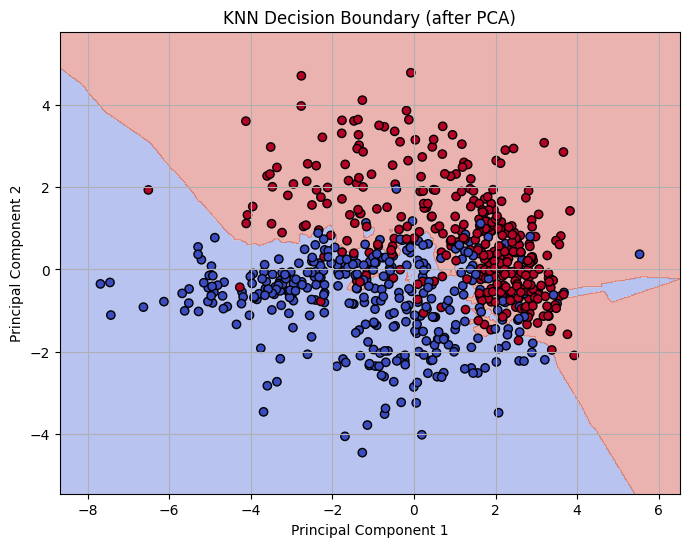

In [24]:
#47. Train a KNN Classifier and visualize the decision boundary4
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train)
x_test_2d = pca.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_2d, y_train)

h = .02
x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.title("KNN Decision Boundary (after PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


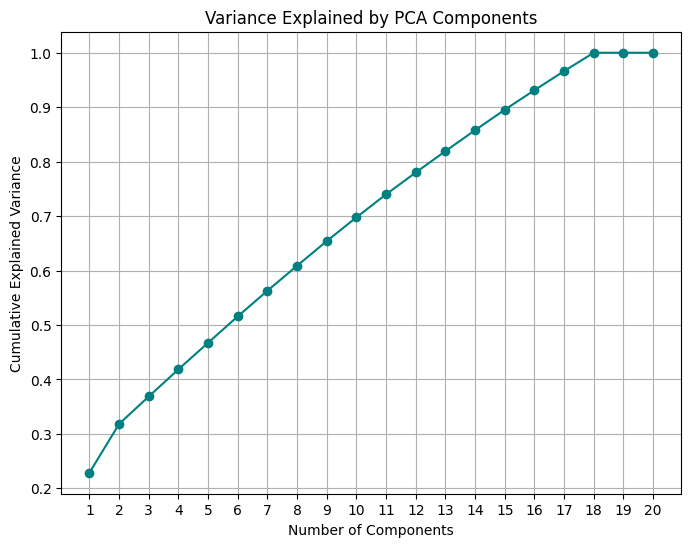

In [25]:
#48. Train a PCA model and analyze the effect of different numbers of components on data variance
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=1)

explained_variances = []
components_range = range(1, 21)

for n in components_range:
    pca = PCA(n_components=n)
    pca.fit(x)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.plot(components_range, explained_variances, marker='o', color='teal')
plt.title("Variance Explained by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(components_range)
plt.grid(True)
plt.show()


